In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.metrics import r2_score

In [58]:
# Read in spread model results that had cross validation for hyperparameter smoothing
df = pd.read_csv('/dsa/groups/capstonesp2023/online/Team05/model_results_probability_cross_val.csv')

df.drop(columns='Unnamed: 0',inplace=True)
print(df.shape)
# making our own primary key for joining both spread and win/loss results. Each game is a unique event.
df['game_key'] = df['Away_Team'] + "-" + df['Home_Team'] + "-" + df['Week'].astype(str)
df.head()

(248, 13)


,Accuracy,Away_Team,F1_Score,Home_Team,Home_Team_Lost_Spread,Model_Probability,Precision,Prediction_Class,Recall,Season,Var_Smoothing,Week,k_best,game_key
0,0.69,Los Angeles Rams,0.65,Arizona Cardinals,1,0.006652,0.80,0,0.73,2022,0.00268,3,12.0,Los Angeles Rams-Arizona Cardinals-3
1,0.69,Las Vegas Raiders,0.65,Tennessee Titans,0,0.133914,0.80,0,0.73,2022,0.00268,3,12.0,Las Vegas Raiders-Tennessee Titans-3
2,0.44,Kansas City Chiefs,0.44,Houston Texans,0,0.146141,0.43,0,0.38,2022,0.00625,15,12.0,Kansas City Chiefs-Houston Texans-15
3,0.60,Kansas City Chiefs,0.60,Cincinnati Bengals,0,0.159115,0.57,0,0.57,2022,0.00954,13,12.0,Kansas City Chiefs-Cincinnati Bengals-13
4,0.69,Buffalo Bills,0.65,Miami Dolphins,0,0.195168,0.80,0,0.73,2022,0.00268,3,12.0,Buffalo Bills-Miami Dolphins-3


In [59]:
df.drop_duplicates(inplace=True)
df.shape

(248, 14)

In [60]:
# Read in Win/Loss results from that model training/testing
cory_df = pd.read_csv('/dsa/groups/capstonesp2023/online/Team05/prediction_probabilities.csv')
cory_df.drop(columns='Unnamed: 0',inplace=True)
print(cory_df.shape)
# making unique game key so we can join with spread model results
cory_df['game_key'] = cory_df['opponent_name'] + "-" + cory_df['team_name'] + "-" + cory_df['gametime_week'].astype(str)
cory_df.head()

(262, 11)


,team_name,opponent_name,gametime_year,gametime_week,win_or_loss,Prediction,home_line_open,spread_actual,model_accuracy,Predicted_Loss_Prob,Predicted_Win_Prob,game_key
0,Cleveland Browns,Pittsburgh Steelers,2022,3,W,W,-3.0,-12,50.0,2.9,97.1,Pittsburgh Steelers-Cleveland Browns-3
1,Seattle Seahawks,Atlanta Falcons,2022,3,L,W,-3.0,4,50.0,3.9,96.1,Atlanta Falcons-Seattle Seahawks-3
2,New England Patriots,Baltimore Ravens,2022,3,L,W,3.0,11,50.0,10.2,89.8,Baltimore Ravens-New England Patriots-3
3,Miami Dolphins,Buffalo Bills,2022,3,W,W,4.5,-2,50.0,0.0,100.0,Buffalo Bills-Miami Dolphins-3
4,New York Jets,Cincinnati Bengals,2022,3,L,W,6.0,15,50.0,8.6,91.4,Cincinnati Bengals-New York Jets-3


In [61]:
cory_df.drop_duplicates(inplace=True)
len(cory_df['game_key'])

260

## making each game_key for spread and W/L into their own lists

In [62]:
List2 = cory_df['game_key'].tolist()

In [63]:
List1 = df['game_key'].tolist()

## Join data together via Inner Join to minimize nulls

In [64]:
joined_df = cory_df.merge(df,on='game_key',how='inner')
joined_df.drop_duplicates(inplace=True)
joined_df.dropna(inplace=True)
joined_df['Home_Team_Lose_Spread_probability']=round(joined_df['Model_Probability']*100,1)
joined_df['Home_Team_Beat_Spread_probability']=round((1-joined_df['Model_Probability'])*100,1)
joined_df.drop(columns=['opponent_name','gametime_week'],inplace=True)
print(joined_df.shape)
print(joined_df.columns)
joined_df.head()

(260, 25)
Index(['team_name', 'gametime_year', 'win_or_loss', 'Prediction',
       'home_line_open', 'spread_actual', 'model_accuracy',
       'Predicted_Loss_Prob', 'Predicted_Win_Prob', 'game_key', 'Accuracy',
       'Away_Team', 'F1_Score', 'Home_Team', 'Home_Team_Lost_Spread',
       'Model_Probability', 'Precision', 'Prediction_Class', 'Recall',
       'Season', 'Var_Smoothing', 'Week', 'k_best',
       'Home_Team_Lose_Spread_probability',
       'Home_Team_Beat_Spread_probability'],
      dtype='object')


,team_name,gametime_year,win_or_loss,Prediction,home_line_open,spread_actual,model_accuracy,Predicted_Loss_Prob,Predicted_Win_Prob,game_key,...,Model_Probability,Precision,Prediction_Class,Recall,Season,Var_Smoothing,Week,k_best,Home_Team_Lose_Spread_probability,Home_Team_Beat_Spread_probability
0,Cleveland Browns,2022,W,W,-3.0,-12,50.0,2.9,97.1,Pittsburgh Steelers-Cleveland Browns-3,...,0.785633,0.8,1,0.73,2022,0.00268,3,12.0,78.6,21.4
1,Seattle Seahawks,2022,L,W,-3.0,4,50.0,3.9,96.1,Atlanta Falcons-Seattle Seahawks-3,...,0.806130,0.8,1,0.73,2022,0.00268,3,12.0,80.6,19.4
2,New England Patriots,2022,L,W,3.0,11,50.0,10.2,89.8,Baltimore Ravens-New England Patriots-3,...,0.812936,0.8,1,0.73,2022,0.00268,3,12.0,81.3,18.7
3,Miami Dolphins,2022,W,W,4.5,-2,50.0,0.0,100.0,Buffalo Bills-Miami Dolphins-3,...,0.195168,0.8,0,0.73,2022,0.00268,3,12.0,19.5,80.5
4,New York Jets,2022,L,W,6.0,15,50.0,8.6,91.4,Cincinnati Bengals-New York Jets-3,...,0.373753,0.8,0,0.73,2022,0.00268,3,12.0,37.4,62.6


## Classifying spread model success, W/L model success, and when both have success

In [65]:
joined_df['win_pred_success']=0
joined_df.loc[joined_df['win_or_loss']==joined_df['Prediction'],'win_pred_success']=1

joined_df['spread_pred_success']=0
joined_df.loc[joined_df['Home_Team_Lost_Spread']==joined_df['Prediction_Class'],'spread_pred_success']=1

joined_df['both_success']=joined_df['spread_pred_success'] + joined_df['win_pred_success']

## Output data for R shiny App

In [66]:
joined_df.to_csv('/dsa/groups/capstonesp2023/online/Team05/WL_Spread_Combined.csv',index=False)

## Ran through several prediction scenarios with combinations of both models (Spread and W/L)

## Both Models Have Success

In [67]:
pp = 0.5

#GTET_50_pct_prob = joined.loc[(pred_vs_actual['Model_Probability'] >= pp) 
                                 #& (pred_vs_actual['Week']>week_start)  ].sort_values(by=['Model_Probability'],ascending=False).drop_duplicates()
#GT_70_pct_prob.reset_index(inplace=True,drop=True)


print(joined_df[(joined_df['spread_pred_success']==1) & (joined_df['win_pred_success']==1) 
                & (joined_df['both_success']==2)]['spread_pred_success'].sum())
print(joined_df.shape[0])
print(round(((joined_df[(joined_df['spread_pred_success']==1) & (joined_df['win_pred_success']==1)
                       & (joined_df['both_success']==2)]['spread_pred_success'].sum())/(joined_df.shape[0])),2))

103
260
0.4


## Only Win-Loss Model Has Success

In [68]:
print(joined_df[(joined_df['spread_pred_success']==0) & (joined_df['win_pred_success']==1) 
                & (joined_df['both_success']==1)]['win_pred_success'].sum())
print(joined_df.shape[0])
print(round(((joined_df[(joined_df['spread_pred_success']==0) & (joined_df['win_pred_success']==1)
                       & (joined_df['both_success']==1)]['win_pred_success'].sum())/(joined_df.shape[0])),2))

56
260
0.22


## Only Spread Model Has Success

In [69]:
print(joined_df[(joined_df['spread_pred_success']==1) & (joined_df['win_pred_success']==0) 
                & (joined_df['both_success']==1)]['spread_pred_success'].sum())
print(joined_df.shape[0])
print(round(((joined_df[(joined_df['spread_pred_success']==1) & (joined_df['win_pred_success']==0)
                       & (joined_df['both_success']==1)]['spread_pred_success'].sum())/(joined_df.shape[0])),2))

39
260
0.15


## Both Models Don't Have Success

In [70]:
print(joined_df[(joined_df['spread_pred_success']==0) & (joined_df['win_pred_success']==0) 
                & (joined_df['both_success']==0)]['spread_pred_success'].count())
print(joined_df.shape[0])
print(round(((joined_df[(joined_df['spread_pred_success']==0) & (joined_df['win_pred_success']==0)
                       & (joined_df['both_success']==0)]['spread_pred_success'].count())/(joined_df.shape[0])),2))

62
260
0.24


## WL Model predicted Win while Home Team Favored and Predicted to Cover Spread

In [71]:
joined_df['W_while_favored_and_predict_beat_spread']=0
joined_df.loc[(joined_df['win_or_loss']==joined_df['Prediction'])
              & (joined_df['Prediction'] == 'W') & (joined_df['home_line_open']<0 ) 
              & (joined_df['Prediction_Class']==0) & (joined_df['Home_Team_Lost_Spread']==0)
              ,'W_while_favored_and_predict_beat_spread']=1

In [72]:
joined_df['predicted_W_and_predict_beat_spread_when_favored']=0
joined_df.loc[ (joined_df['Prediction'] == 'W') & (joined_df['home_line_open']<0 ) 
              & (joined_df['Prediction_Class']==0) 
              ,'predicted_W_and_predict_beat_spread_when_favored']=1

In [73]:
both_success = joined_df.loc[(joined_df['predicted_W_and_predict_beat_spread_when_favored']==1)]
print(both_success['W_while_favored_and_predict_beat_spread'].sum())
print(both_success['predicted_W_and_predict_beat_spread_when_favored'].sum())
print(round(((both_success['W_while_favored_and_predict_beat_spread'].sum())/(both_success['predicted_W_and_predict_beat_spread_when_favored'].sum())),2))

25
41
0.61


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f909de0e0b8>]],
      dtype=object)

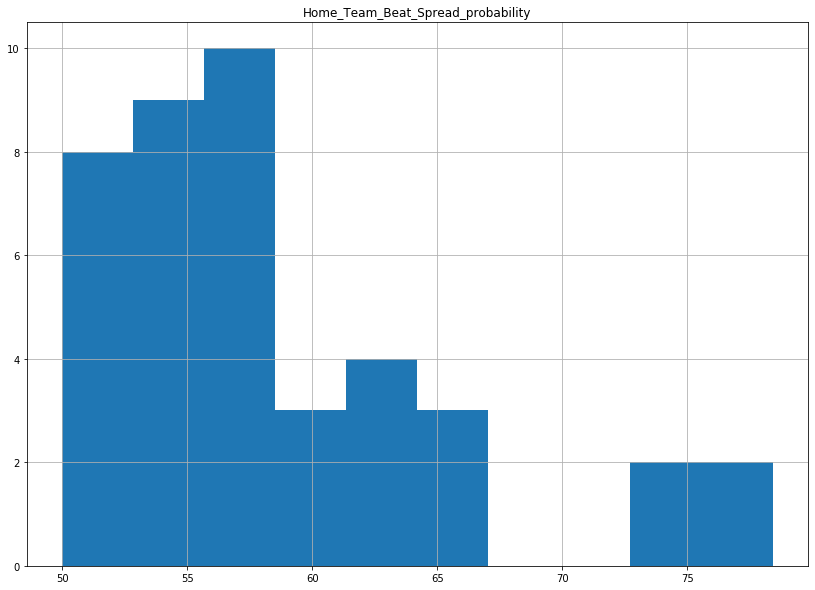

In [74]:
# within this subset of scenarios, where do the probabilities end up?
both_success.hist(column='Home_Team_Beat_Spread_probability',bins=10,figsize=(14,10))

## WL Model predicted Loss while Home Team Underdog and Predicted to Lose Spread

In [75]:
joined_df['L_while_dog_and_predict_lose_spread']=0
joined_df.loc[(joined_df['win_or_loss']==joined_df['Prediction'])
              & (joined_df['Prediction'] == 'L') & (joined_df['home_line_open']>0 ) 
              & (joined_df['Prediction_Class']==1) & (joined_df['Home_Team_Lost_Spread']==1)
              ,'L_while_dog_and_predict_lose_spread']=1

In [76]:
joined_df['predicted_L_and_predict_lose_spread_when_underdog']=0
joined_df.loc[ (joined_df['Prediction'] == 'L') & (joined_df['home_line_open']>0 ) 
              & (joined_df['Prediction_Class']==1) 
              ,'predicted_L_and_predict_lose_spread_when_underdog']=1

In [77]:
both_success_L = joined_df.loc[(joined_df['predicted_L_and_predict_lose_spread_when_underdog']==1)]
print(both_success_L['L_while_dog_and_predict_lose_spread'].sum())
print(both_success_L['predicted_L_and_predict_lose_spread_when_underdog'].sum())
print(round(((both_success_L['L_while_dog_and_predict_lose_spread'].sum())/(both_success_L['predicted_L_and_predict_lose_spread_when_underdog'].sum())),2))

20
41
0.49


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f909dd1bcf8>]],
      dtype=object)

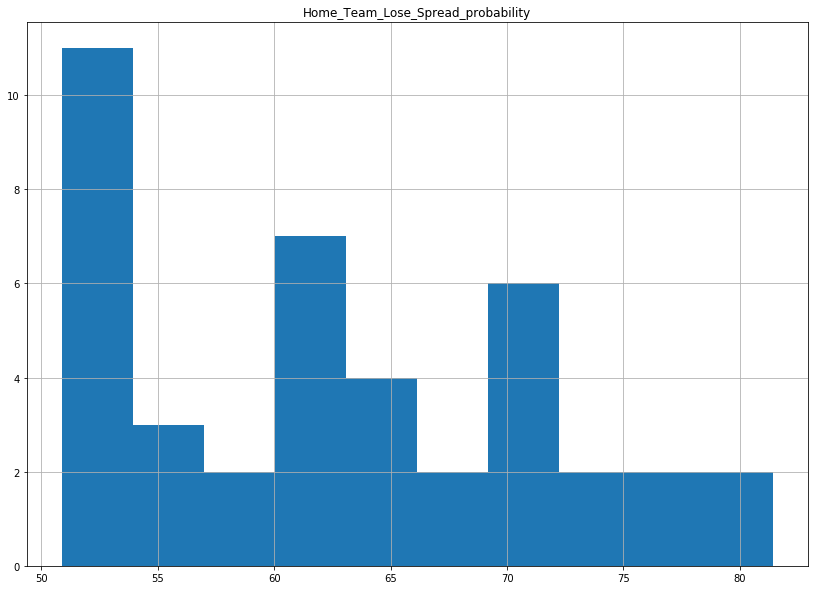

In [78]:
# within this subset of scenarios, where do the probabilities end up?
both_success_L.hist(column='Home_Team_Lose_Spread_probability',bins=10,figsize=(14,10))

## WL Model predicted Win while Home Team Underdog and Predicted to Lose Spread

In [79]:
joined_df['W_while_dog_and_predict_lose_spread']=0
joined_df.loc[(joined_df['win_or_loss']==joined_df['Prediction'])
              & (joined_df['Prediction'] == 'W') & (joined_df['home_line_open']>0 ) 
              & (joined_df['Prediction_Class']==1) & (joined_df['Home_Team_Lost_Spread']==1)
              ,'W_while_dog_and_predict_lose_spread']=1

In [80]:
joined_df['predicted_W_and_predict_lose_spread_when_underdog']=0
joined_df.loc[ (joined_df['Prediction'] == 'W') & (joined_df['home_line_open']>0 ) 
              & (joined_df['Prediction_Class']==1) 
              ,'predicted_W_and_predict_lose_spread_when_underdog']=1

In [81]:
WL_W_spreadL_dog = joined_df.loc[(joined_df['predicted_W_and_predict_lose_spread_when_underdog']==1)]
print(WL_W_spreadL_dog['W_while_dog_and_predict_lose_spread'].sum())
print(WL_W_spreadL_dog['predicted_W_and_predict_lose_spread_when_underdog'].sum())
print(round(((WL_W_spreadL_dog['W_while_dog_and_predict_lose_spread'].sum())/(WL_W_spreadL_dog['predicted_W_and_predict_lose_spread_when_underdog'].sum())),2))

0
11
0.0


## WL Model predicted L while Home Team Favored and Predicted to Beat Spread

In [82]:
joined_df['L_while_fav_and_predict_beat_spread']=0
joined_df.loc[(joined_df['win_or_loss']==joined_df['Prediction'])
              & (joined_df['Prediction'] == 'L') & (joined_df['home_line_open']<0 ) 
              & (joined_df['Prediction_Class']==0) & (joined_df['Home_Team_Lost_Spread']==0)
              ,'L_while_fav_and_predict_beat_spread']=1

In [83]:
joined_df['predicted_L_and_predict_beat_spread_when_favored']=0
joined_df.loc[ (joined_df['Prediction'] == 'L') & (joined_df['home_line_open']<0 ) 
              & (joined_df['Prediction_Class']==0) 
              ,'predicted_L_and_predict_beat_spread_when_favored']=1

In [84]:
WL_L_spreadW_fav = joined_df.loc[(joined_df['predicted_L_and_predict_beat_spread_when_favored']==1)]
print(WL_L_spreadW_fav['L_while_fav_and_predict_beat_spread'].sum())
print(WL_L_spreadW_fav['predicted_L_and_predict_beat_spread_when_favored'].sum())
print(round(((WL_L_spreadW_fav['L_while_fav_and_predict_beat_spread'].sum())/(WL_L_spreadW_fav['predicted_L_and_predict_beat_spread_when_favored'].sum())),2))

0
14
0.0


## WL Model predicted Win while Home Team Underdog and Predicted to Beat Spread

In [85]:
joined_df['W_while_dog_and_predict_beat_spread']=0
joined_df.loc[(joined_df['win_or_loss']==joined_df['Prediction'])
              & (joined_df['Prediction'] == 'W') & (joined_df['home_line_open']>0 ) 
              & (joined_df['Prediction_Class']==0) & (joined_df['Home_Team_Lost_Spread']==0)
              ,'W_while_dog_and_predict_beat_spread']=1

In [86]:
joined_df['predicted_W_and_predict_beat_spread_when_underdog']=0
joined_df.loc[ (joined_df['Prediction'] == 'W') & (joined_df['home_line_open']>0 ) 
              & (joined_df['Prediction_Class']==0) 
              ,'predicted_W_and_predict_beat_spread_when_underdog']=1

In [87]:
WL_W_spreadW_dog = joined_df.loc[(joined_df['predicted_W_and_predict_beat_spread_when_underdog']==1)]
print(WL_W_spreadW_dog['W_while_dog_and_predict_beat_spread'].sum())
print(WL_W_spreadW_dog['predicted_W_and_predict_beat_spread_when_underdog'].sum())
print(round(((WL_W_spreadW_dog['W_while_dog_and_predict_beat_spread'].sum())/(WL_W_spreadW_dog['predicted_W_and_predict_beat_spread_when_underdog'].sum())),2))

9
17
0.53


## WL Model predicted Win while Home Team Favored and Predicted to Lose to Spread

In [88]:
joined_df['W_while_fav_and_predict_lose_spread']=0
joined_df.loc[(joined_df['win_or_loss']==joined_df['Prediction'])
              & (joined_df['Prediction'] == 'W') & (joined_df['home_line_open']<0 ) 
              & (joined_df['Prediction_Class']==1) & (joined_df['Home_Team_Lost_Spread']==1)
              ,'W_while_fav_and_predict_lose_spread']=1

In [89]:
joined_df['predicted_W_and_predict_lose_spread_when_fav']=0
joined_df.loc[ (joined_df['Prediction'] == 'W') & (joined_df['home_line_open']<0 ) 
              & (joined_df['Prediction_Class']==1) 
              ,'predicted_W_and_predict_lose_spread_when_fav']=1

In [90]:
WL_W_spreadL_fav = joined_df.loc[(joined_df['predicted_W_and_predict_lose_spread_when_fav']==1)]
print(WL_W_spreadL_fav['W_while_fav_and_predict_lose_spread'].sum())
print(WL_W_spreadL_fav['predicted_W_and_predict_lose_spread_when_fav'].sum())
print(round(((WL_W_spreadL_fav['W_while_fav_and_predict_lose_spread'].sum())/(WL_W_spreadL_fav['predicted_W_and_predict_lose_spread_when_fav'].sum())),2))

15
48
0.31


## WL Model predicted L while Home Team Favored and Predicted to Lose to Spread

In [91]:
joined_df['L_while_fav_and_predict_lose_spread']=0
joined_df.loc[(joined_df['win_or_loss']==joined_df['Prediction'])
              & (joined_df['Prediction'] == 'L') & (joined_df['home_line_open']<0 ) 
              & (joined_df['Prediction_Class']==1) & (joined_df['Home_Team_Lost_Spread']==1)
              ,'L_while_fav_and_predict_lose_spread']=1

In [92]:
joined_df['predicted_L_and_predict_lose_spread_when_fav']=0
joined_df.loc[ (joined_df['Prediction'] == 'L') & (joined_df['home_line_open']<0 ) 
              & (joined_df['Prediction_Class']==1) 
              ,'predicted_L_and_predict_lose_spread_when_fav']=1

In [93]:
WL_L_spreadL_fav = joined_df.loc[(joined_df['predicted_L_and_predict_lose_spread_when_fav']==1)]
print(WL_L_spreadL_fav['L_while_fav_and_predict_lose_spread'].sum())
print(WL_L_spreadL_fav['predicted_L_and_predict_lose_spread_when_fav'].sum())
print(round(((WL_L_spreadL_fav['L_while_fav_and_predict_lose_spread'].sum())/(WL_L_spreadL_fav['predicted_L_and_predict_lose_spread_when_fav'].sum())),2))

30
65
0.46


## WL Model predicted Loss while Home Team Underdog and Predicted to Beat Spread

In [94]:
joined_df['L_while_dog_and_predict_beat_spread']=0
joined_df.loc[(joined_df['win_or_loss']==joined_df['Prediction'])
              & (joined_df['Prediction'] == 'L') & (joined_df['home_line_open']>0 ) 
              & (joined_df['Prediction_Class']==0) & (joined_df['Home_Team_Lost_Spread']==0)
              ,'L_while_dog_and_predict_beat_spread']=1

In [95]:
joined_df['predicted_L_and_predict_beat_spread_when_underdog']=0
joined_df.loc[ (joined_df['Prediction'] == 'L') & (joined_df['home_line_open']>0 ) 
              & (joined_df['Prediction_Class']==0) 
              ,'predicted_L_and_predict_beat_spread_when_underdog']=1

In [96]:
WL_L_spreadW_dog = joined_df.loc[(joined_df['predicted_L_and_predict_beat_spread_when_underdog']==1)]
print(WL_L_spreadW_dog['L_while_dog_and_predict_beat_spread'].sum())
print(WL_L_spreadW_dog['predicted_L_and_predict_beat_spread_when_underdog'].sum())
print(round(((WL_L_spreadW_dog['L_while_dog_and_predict_beat_spread'].sum())/(WL_L_spreadW_dog['predicted_L_and_predict_beat_spread_when_underdog'].sum())),2))

4
23
0.17
